In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv('train2.csv')

In [0]:
test=pd.read_csv('test2.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


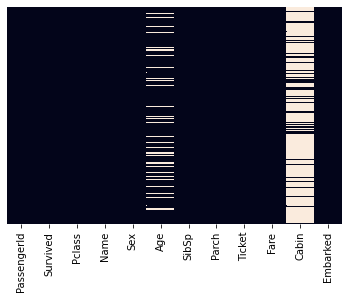

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [0]:
train['Age']=train['Age'].fillna(train['Age'].mode()[0])

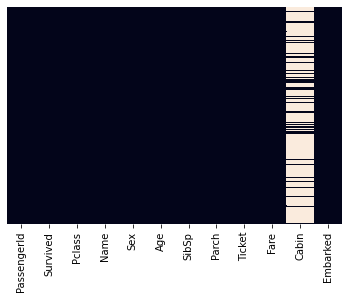

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [0]:
train.drop(labels=['Cabin'],axis=1,inplace=True)


In [0]:
nan_cols = [i for i in train.columns if train[i].isnull().any()] 

In [0]:
nan_cols

['Embarked']

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

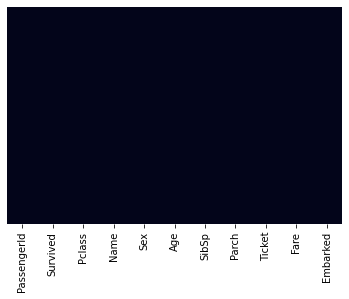

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [0]:
cat_features=[i for i in train.columns if train.dtypes[i]=='object'] 

In [0]:
cat_features

['Name', 'Sex', 'Ticket', 'Embarked']

In [0]:
train.drop(labels=['Name'],axis=1,inplace=True)

In [0]:
cat_features=[i for i in train.columns if train.dtypes[i]=='object'] 

In [0]:
cat_features

['Sex', 'Ticket', 'Embarked']

In [0]:
def category_onehot_multcols(multcolumns):
    df_final=train
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(train[fields],drop_first=True)
        
        train.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([train,df_final],axis=1)
        
    return df_final

In [0]:
train1=category_onehot_multcols(cat_features)

Sex
Ticket
Embarked


In [0]:
train1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,110413,110465,110564,110813,111240,111320,111361,111369,111426,111427,111428,112050,112052,112053,112058,112059,112277,112379,113028,113043,113050,113051,113055,113056,113059,113501,113503,113505,113509,113510,113514,113572,...,SOTON/O.Q. 3101312,SOTON/O.Q. 392078,SOTON/O.Q. 392087,SOTON/O2 3101272,SOTON/O2 3101287,SOTON/OQ 3101316,SOTON/OQ 3101317,SOTON/OQ 392076,SOTON/OQ 392082,SOTON/OQ 392086,SOTON/OQ 392089,SOTON/OQ 392090,STON/O 2. 3101269,STON/O 2. 3101273,STON/O 2. 3101274,STON/O 2. 3101275,STON/O 2. 3101280,STON/O 2. 3101285,STON/O 2. 3101286,STON/O 2. 3101288,STON/O 2. 3101289,STON/O 2. 3101292,STON/O 2. 3101293,STON/O 2. 3101294,STON/O2. 3101271,STON/O2. 3101279,STON/O2. 3101282,STON/O2. 3101283,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Here we are using Random forest technique which is ensamble technique

In [0]:
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.model_selection import train_test_split
X = train1.drop('Survived', axis=1)
y = train1['Survived']
#X = pd.get_dummies(X)
#y = pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7847533632286996

Here we are using logistic regression with the help of sklearn library

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.8295964125560538
